# <font color='#3e9dbf'>Import Lib and Data</font>

In [272]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [273]:
url = "./iris.data"
columns_iris = ["sepal length", "sepal width", "petal length", "petal width", "class"]

data = pd.read_csv(url, names=columns_iris, sep=',', na_values='?', skipinitialspace =True)

# <font color='#3e9dbf'>Function and config</font>

## <font color='#e89c9a'><ul><li>Show Statistical values</li></ul></font>

In [274]:
def showStatistics(attr_name):
  
  table = []

  table.append(['Mean: ', f"{data[attr_name].mean():,.4f}"])
  table.append(['Median: ', f"{data[attr_name].median():,.4f}"])
  table.append(['Mode: ', f"{data[attr_name].mode().iloc[0]:,}"])
  table.append(['SD: ', f"{data[attr_name].std():,.4f}"])
  table.append(['Variance: ', f"{data[attr_name].var():,.4f}"])
  table.append(['Min: ', f"{data[attr_name].min():,}"])
  table.append(['Q₁: ', f"{data[attr_name].quantile(.25):,.4f}"])
  table.append(['Q₂: ', f"{data[attr_name].quantile(.50):,.4f}"])
  table.append(['Q₃: ', f"{data[attr_name].quantile(.75):,.4f}"])
  table.append(['Max: ', f"{data[attr_name].max():,}"])
  table.append(['Skewness: ', f"{data[attr_name].skew():,.4f}"])

  print(tabulate(table, headers=['', 'Value'], tablefmt='grid'))

## <font color='#e89c9a'><ul><li>Plot Histograms</li></ul></font>

In [275]:
def plot_histogram(attr_name):
  skewness = round(data[attr_name].skew(), 4)
  plt.figure(figsize=(9, 6))
  data[attr_name].hist(bins=10, color='#e9c7c6').set_facecolor("none")

  title = ' '.join([word.capitalize() for word in attr_name.split()])

  # plt.title(title, fontsize=16, fontweight='bold')
  plt.xlabel(title, fontsize=16)
  plt.ylabel('Frequency', fontsize=16)
  plt.legend([f'Skewness: {skewness}'], frameon=False, fontsize=18, prop={'weight': 'bold'})

  ax = plt.gca()
  ax.spines['top'].set_color('#4c4b49')
  ax.spines['right'].set_color('#4c4b49')
  ax.spines['left'].set_color('#4c4b49')
  ax.spines['bottom'].set_color('#4c4b49')

  plt.gca().tick_params(axis='both', colors='#4c4b49')
  plt.xticks(fontsize=18, fontweight='bold')
  plt.yticks(fontsize=18, fontweight='bold')
  plt.tight_layout()
  plt.gcf().set_facecolor("none")
  plt.show()

## <font color='#e89c9a'><ul><li>Comparison Variables by Class</li></ul></font>

In [ ]:
def comparison_by_class(attr_name):
  
  title = ' '.join([word.capitalize() for word in attr_name.split()])
  palette = {'Iris-setosa': '#e9c7c6', 'Iris-versicolor': '#9fc3d0', 'Iris-virginica': '#c6e9c7'}

  plt.figure(figsize=(9, 6))
  sns.boxplot(x='class', y=attr_name, hue='class', data=data, palette=palette, dodge=False).set_facecolor("none")
  # plt.title(f'Boxplot: Comparison of {title} by Class', fontsize=16)
  plt.xlabel('Class', fontsize=0)
  plt.ylabel(title, fontsize=16)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.gca()
  plt.gcf().set_facecolor("none")
  plt.show()

  plt.figure(figsize=(9, 6))
  sns.kdeplot(data=data, x=attr_name, hue='class', fill=True, common_norm=False, palette=palette).set_facecolor("none")
  # plt.title(f'KDE Plot: Comparison of {title} by Class', fontsize=16)
  plt.xlabel(title, fontsize=16)
  plt.ylabel('Density', fontsize=16)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.gcf().set_facecolor("none")
  # plt.savefig(f'./kde_plot_{attr_name}.png', transparent=True, bbox_inches='tight')
  plt.show()

In [277]:
def calculate_class_statistics(attr_name):
  # Create an empty list to store statistics
  stats_list = []

  # Loop through each class and calculate statistics
  for class_name, group in data.groupby('class'):
    stats = {
      'Class': class_name,
      'Mean': round(group[attr_name].mean(), 4),
      'Median': round(group[attr_name].median(), 4),
      'Mode': round(group[attr_name].mode().iloc[0], 4),
      'SD': round(group[attr_name].std(), 4),
      'Variance': round(group[attr_name].var(), 4),
      'Min': round(group[attr_name].min(), 4),
      'Q₁': round(group[attr_name].quantile(.25), 4),
      'Q₂': round(group[attr_name].quantile(.50), 4),
      'Q₃': round(group[attr_name].quantile(.75), 4),
      'Max': round(group[attr_name].max(), 4),
      'Skewness': round(group[attr_name].skew(), 4)
    }
    stats_list.append(stats)

  # Example usage
  stats_df = pd.DataFrame(stats_list)
  print(tabulate(stats_df, headers='keys', tablefmt='grid'))

# <font color='#3e9dbf'>Dataset Info</font>

In [278]:
data.info()
data.head(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# <font color='#3e9dbf'>Feature</font>

## <font color='#e89c9a'><ul><li>Class</li></ul></font>

In [279]:
print(data['class'].value_counts())
print('Unique: ', len(data['class'].unique()))

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Unique:  3


## <font color='#e89c9a'><ul><li>Sepal Length</li></ul></font>

In [280]:
attr_name = 'sepal length'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  5.8433 |
+-----------+---------+
| Median:   |  5.8    |
+-----------+---------+
| Mode:     |  5      |
+-----------+---------+
| SD:       |  0.8281 |
+-----------+---------+
| Variance: |  0.6857 |
+-----------+---------+
| Min:      |  4.3    |
+-----------+---------+
| Q₁:       |  5.1    |
+-----------+---------+
| Q₂:       |  5.8    |
+-----------+---------+
| Q₃:       |  6.4    |
+-----------+---------+
| Max:      |  7.9    |
+-----------+---------+
| Skewness: |  0.3149 |
+-----------+---------+


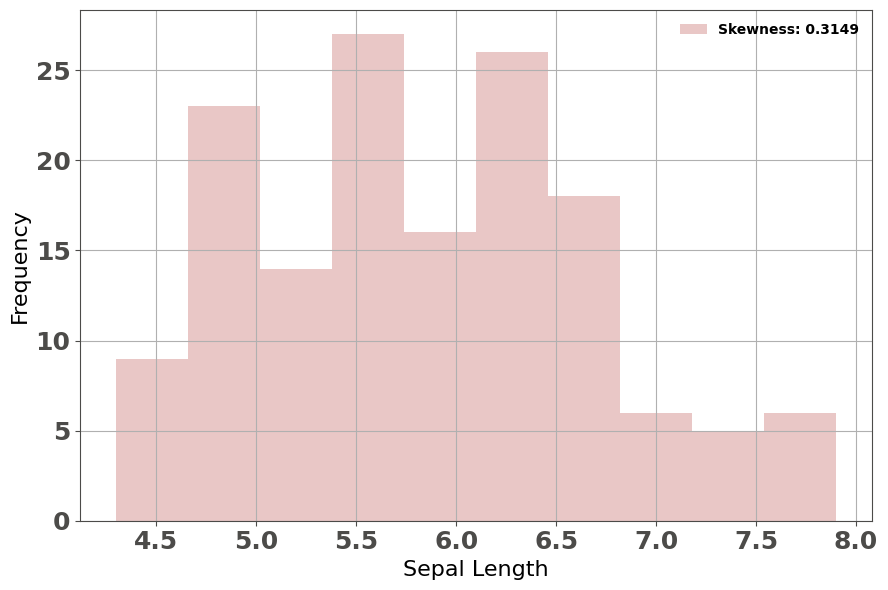

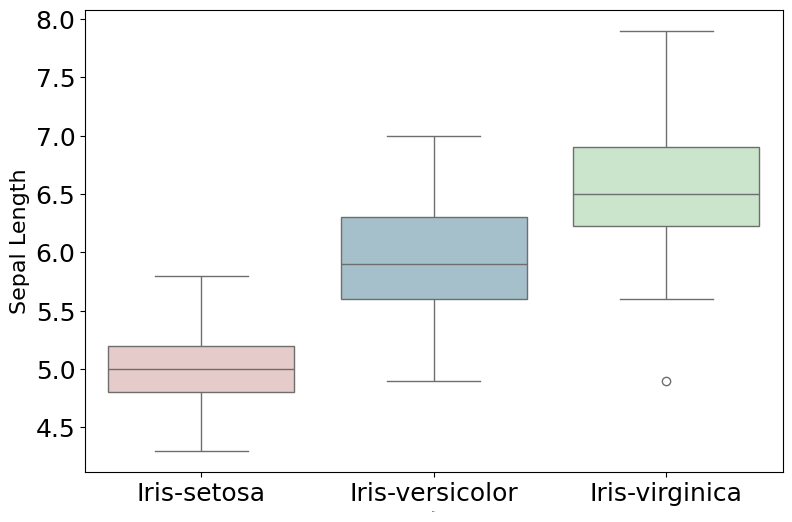

AttributeError: FillBetweenPolyCollection.set() got an unexpected keyword argument 'frameon'

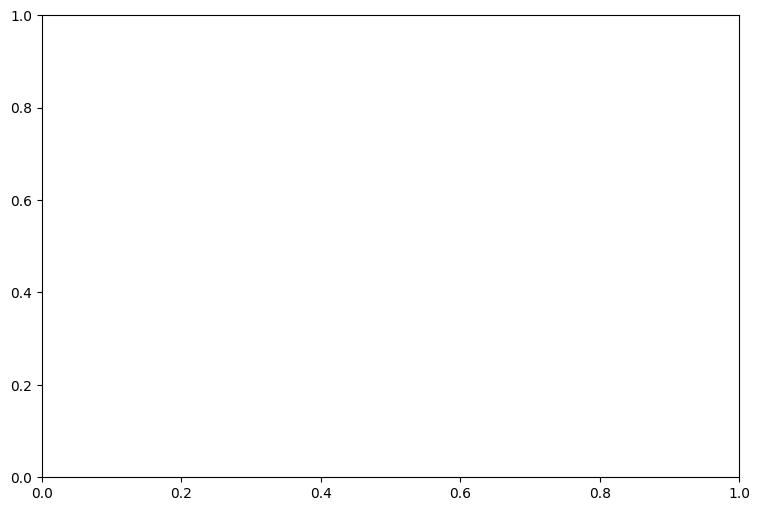

In [281]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Sepal Width</li></ul></font>

In [ ]:
attr_name = 'sepal width'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  3.054  |
+-----------+---------+
| Median:   |  3      |
+-----------+---------+
| Mode:     |  3      |
+-----------+---------+
| SD:       |  0.4336 |
+-----------+---------+
| Variance: |  0.188  |
+-----------+---------+
| Min:      |  2      |
+-----------+---------+
| Q₁:       |  2.8    |
+-----------+---------+
| Q₂:       |  3      |
+-----------+---------+
| Q₃:       |  3.3    |
+-----------+---------+
| Max:      |  4.4    |
+-----------+---------+
| Skewness: |  0.3341 |
+-----------+---------+


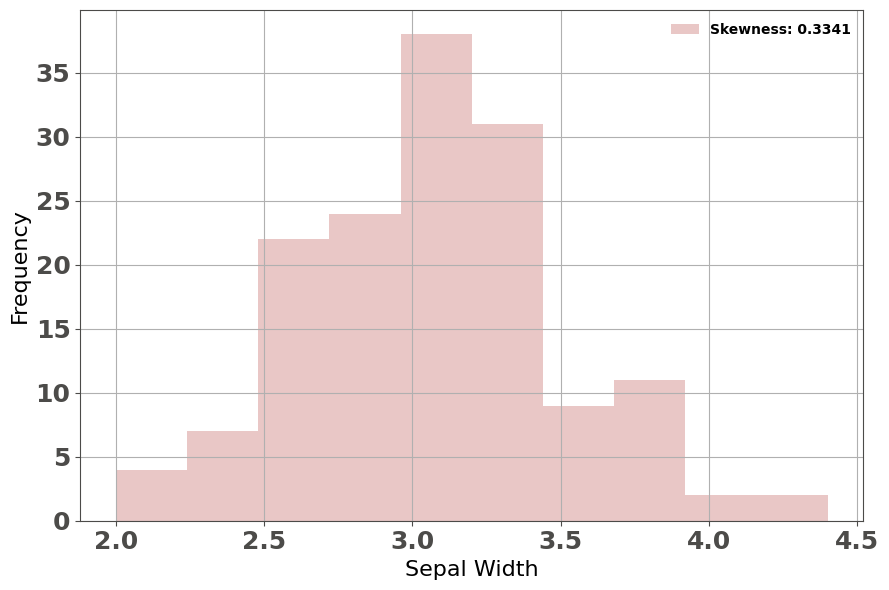

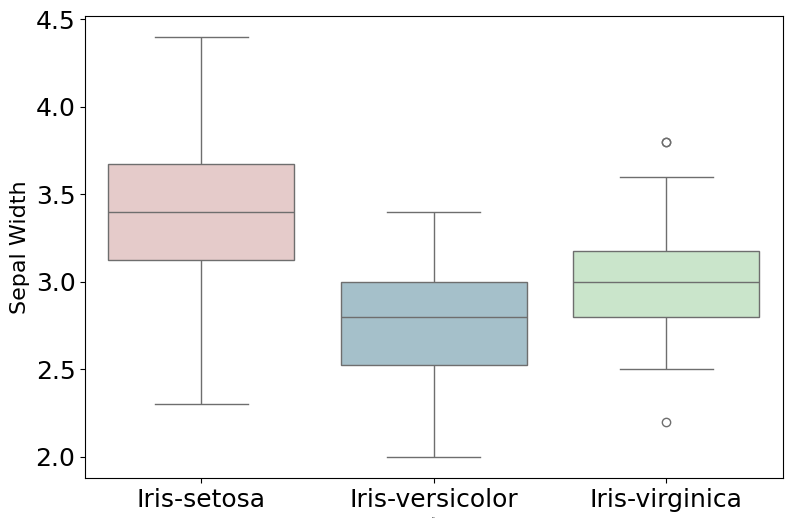

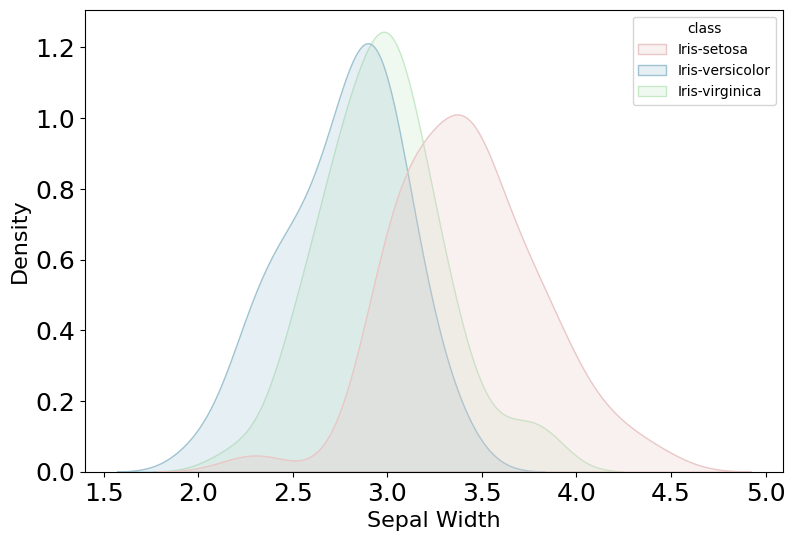

+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |    Q₁ |   Q₂ |    Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+=======+======+=======+=======+============+
|  0 | Iris-setosa     |  3.418 |      3.4 |    3.4 | 0.381  |     0.1452 |   2.3 | 3.125 |  3.4 | 3.675 |   4.4 |     0.1071 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|  1 | Iris-versicolor |  2.77  |      2.8 |    3   | 0.3138 |     0.0985 |   2   | 2.525 |  2.8 | 3     |   3.4 |    -0.3628 |
+----+-----------------+--------+----------+--------+--------+------------+-------+-------+------+-------+-------+------------+
|  2 | Iris-virginica  |  2.974 |      3   |    3   | 0.3225 |     0.104  |   2.2 | 2.8   |  3   | 3.175

In [ ]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Petal Length</li></ul></font>

In [ ]:
attr_name = 'petal length'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  3.7587 |
+-----------+---------+
| Median:   |  4.35   |
+-----------+---------+
| Mode:     |  1.5    |
+-----------+---------+
| SD:       |  1.7644 |
+-----------+---------+
| Variance: |  3.1132 |
+-----------+---------+
| Min:      |  1      |
+-----------+---------+
| Q₁:       |  1.6    |
+-----------+---------+
| Q₂:       |  4.35   |
+-----------+---------+
| Q₃:       |  5.1    |
+-----------+---------+
| Max:      |  6.9    |
+-----------+---------+
| Skewness: | -0.2745 |
+-----------+---------+


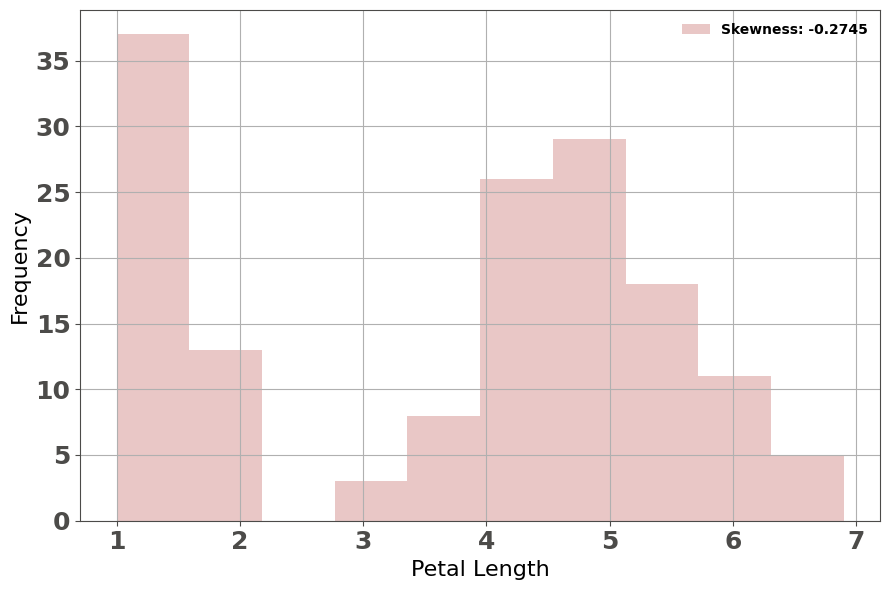

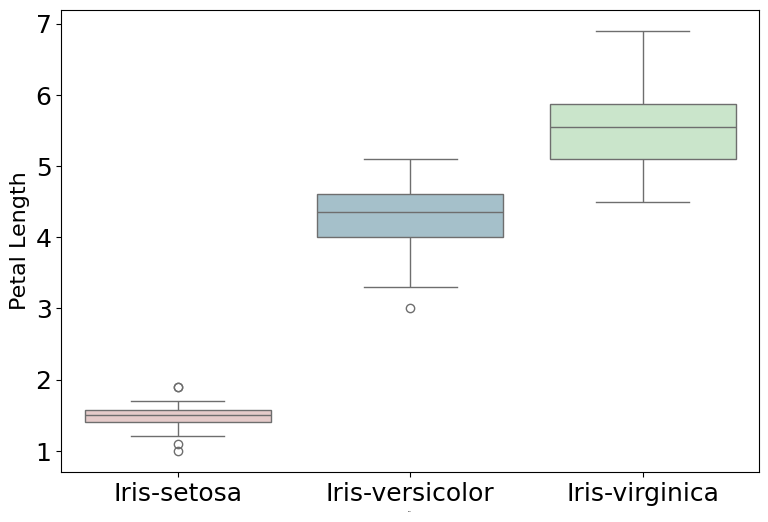

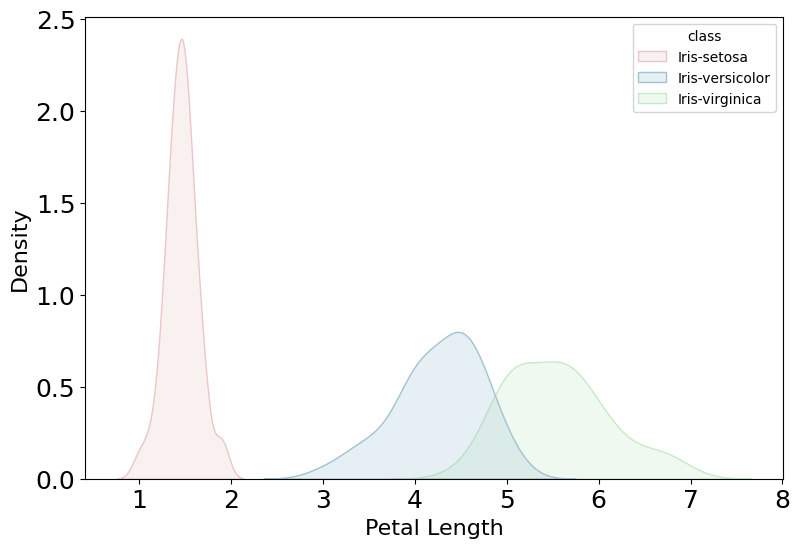

+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |   Q₁ |   Q₂ |    Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+======+======+=======+=======+============+
|  0 | Iris-setosa     |  1.464 |     1.5  |    1.5 | 0.1735 |     0.0301 |   1   |  1.4 | 1.5  | 1.575 |   1.9 |     0.0718 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|  1 | Iris-versicolor |  4.26  |     4.35 |    4.5 | 0.4699 |     0.2208 |   3   |  4   | 4.35 | 4.6   |   5.1 |    -0.6065 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+-------+-------+------------+
|  2 | Iris-virginica  |  5.552 |     5.55 |    5.1 | 0.5519 |     0.3046 |   4.5 |  5.1 | 5.55 | 5.875 |   6.9

In [ ]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

## <font color='#e89c9a'><ul><li>Petal Width</li></ul></font>

In [ ]:
attr_name = 'petal width'

+-----------+---------+
|           |   Value |
+===========+=========+
| Mean:     |  1.1987 |
+-----------+---------+
| Median:   |  1.3    |
+-----------+---------+
| Mode:     |  0.2    |
+-----------+---------+
| SD:       |  0.7632 |
+-----------+---------+
| Variance: |  0.5824 |
+-----------+---------+
| Min:      |  0.1    |
+-----------+---------+
| Q₁:       |  0.3    |
+-----------+---------+
| Q₂:       |  1.3    |
+-----------+---------+
| Q₃:       |  1.8    |
+-----------+---------+
| Max:      |  2.5    |
+-----------+---------+
| Skewness: | -0.105  |
+-----------+---------+


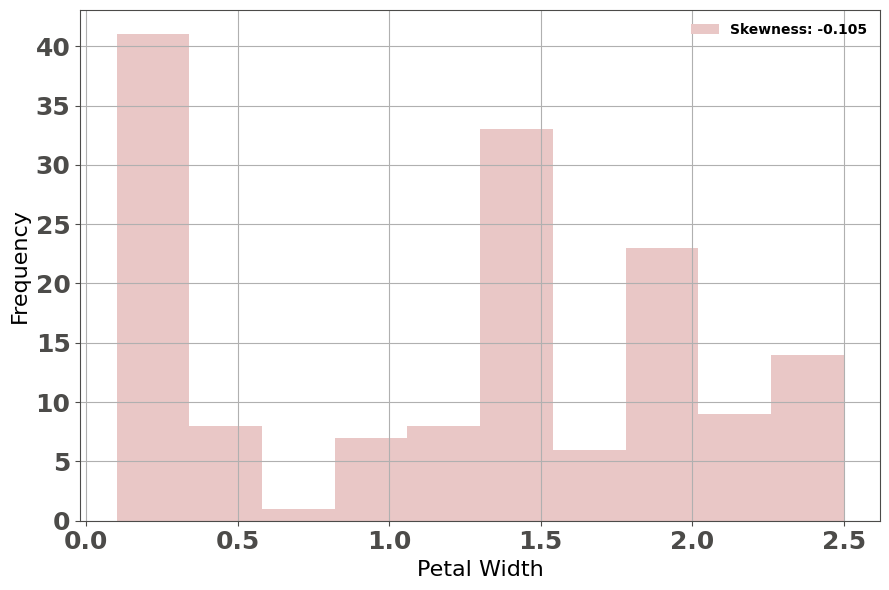

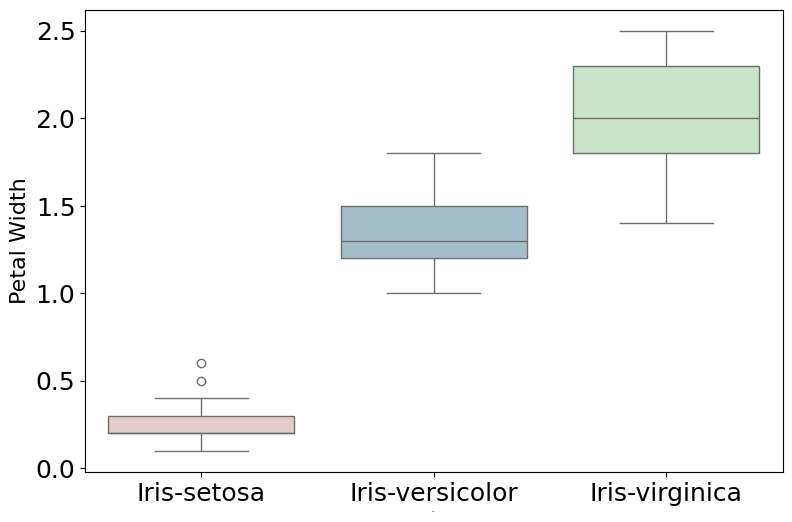

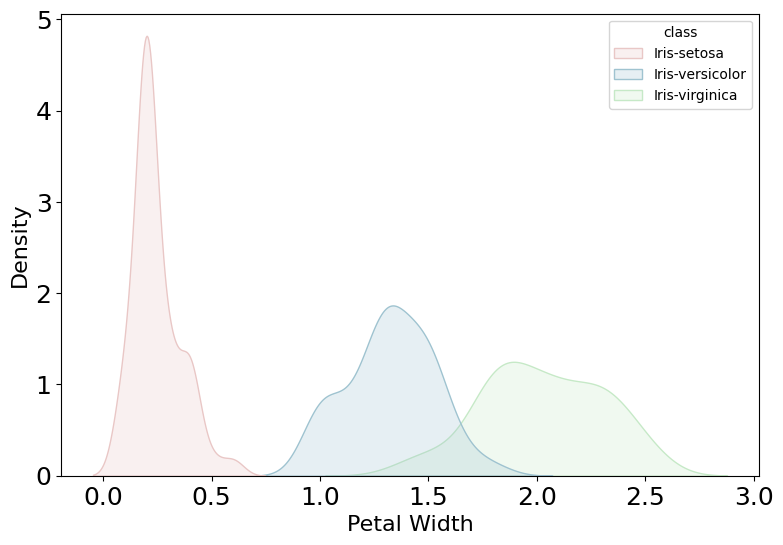

+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|    | Class           |   Mean |   Median |   Mode |     SD |   Variance |   Min |   Q₁ |   Q₂ |   Q₃ |   Max |   Skewness |
+====+=================+========+==========+========+========+============+=======+======+======+======+=======+============+
|  0 | Iris-setosa     |  0.244 |      0.2 |    0.2 | 0.1072 |     0.0115 |   0.1 |  0.2 |  0.2 |  0.3 |   0.6 |     1.1972 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|  1 | Iris-versicolor |  1.326 |      1.3 |    1.3 | 0.1978 |     0.0391 |   1   |  1.2 |  1.3 |  1.5 |   1.8 |    -0.0312 |
+----+-----------------+--------+----------+--------+--------+------------+-------+------+------+------+-------+------------+
|  2 | Iris-virginica  |  2.026 |      2   |    1.8 | 0.2747 |     0.0754 |   1.4 |  1.8 |  2   |  2.3 |   2.5 |    -0

In [ ]:
showStatistics(attr_name)
plot_histogram(attr_name)
comparison_by_class(attr_name)
calculate_class_statistics(attr_name)

# <font color='#3e9dbf'>Relation</font>

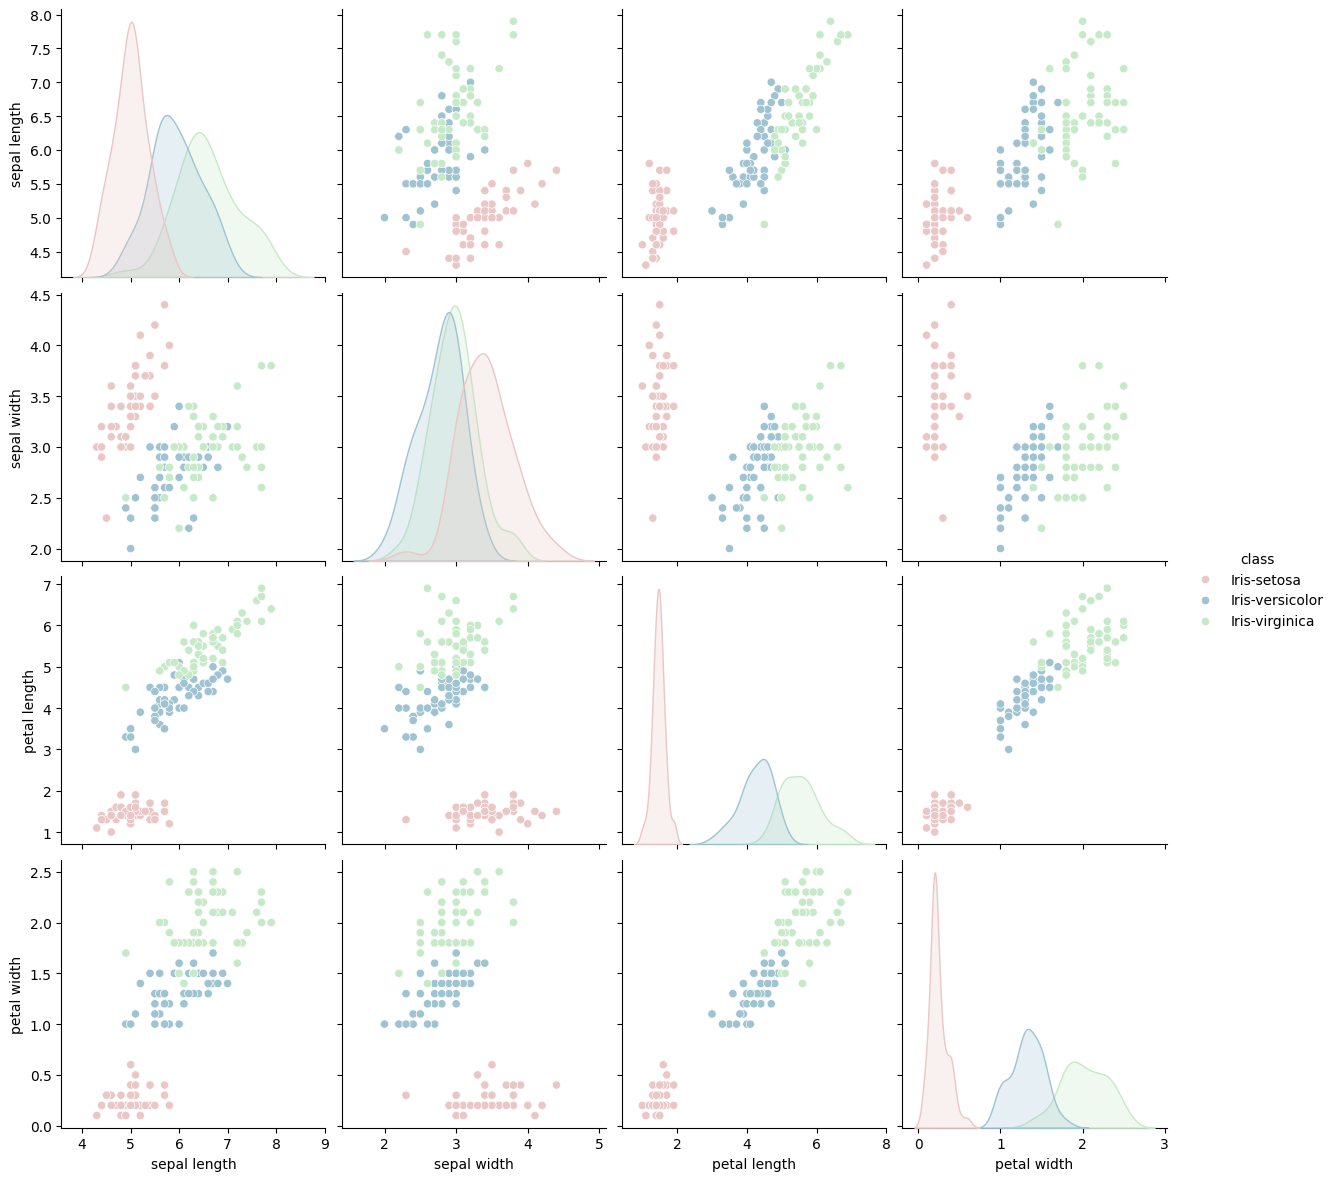

In [ ]:
palette = {'Iris-setosa': '#e9c7c6', 'Iris-versicolor': '#9fc3d0', 'Iris-virginica': '#c6e9c7'}

pair_plot = sns.pairplot(data, height=3, diag_kind='kde', hue='class', palette=palette)

# Set background color to none for all elements
for ax in pair_plot.axes.flatten():
  ax.set_facecolor("none")

# pair_plot.savefig('./pair_plot.png', transparent=True, bbox_inches='tight')

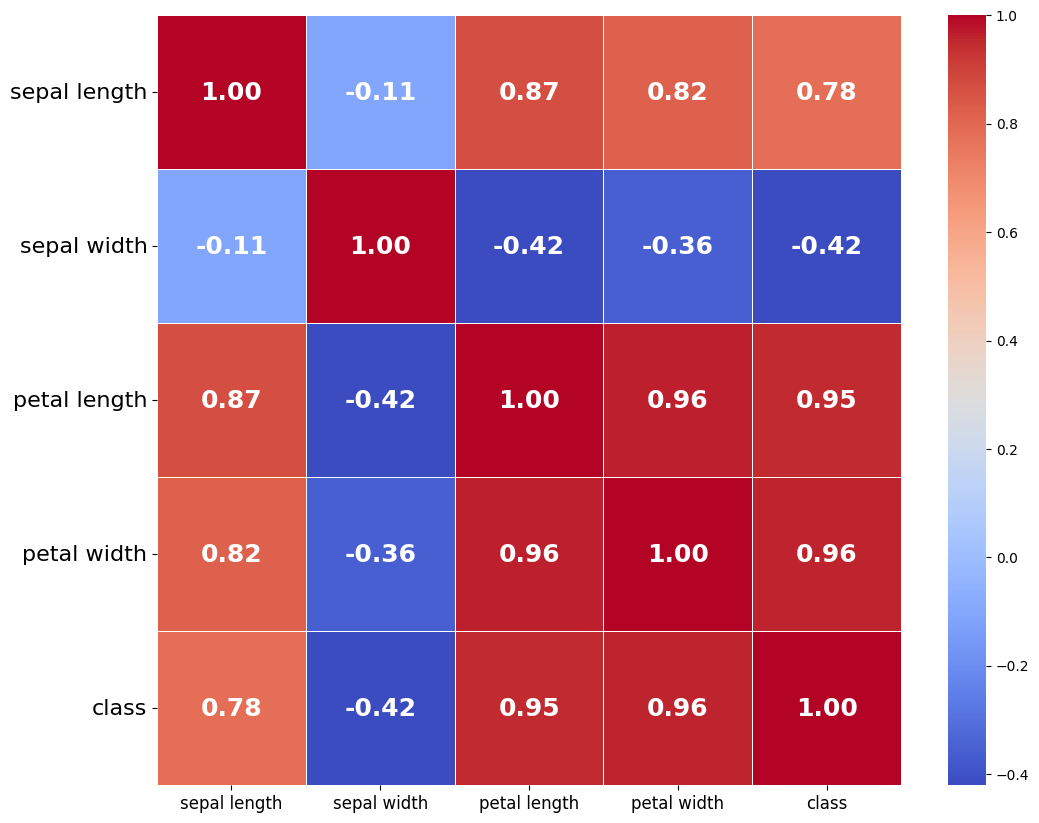

In [284]:
encoder = LabelEncoder()
data_heat = data.copy()
data_heat['class'] = encoder.fit_transform(data_heat['class'])

plt.figure(figsize=(12, 10))
correlation_matrix = data_heat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 18, "weight": "bold"})
# plt.title('Correlation Heatmap - Iris Dataset')
plt.gca().set_facecolor("none")
plt.gcf().set_facecolor("none")
plt.xticks(fontsize=12)
plt.yticks(fontsize=16, rotation=0, wrap=True)
plt.show()

# <font color='#3e9dbf'>Data Preprocess</font>

## <font color='#e89c9a'><ul><li>Feature Scaling</li></ul></font>

In [ ]:
min_max_scaler = MinMaxScaler()
data.iloc[:, :-1] = min_max_scaler.fit_transform(data.iloc[:, :-1])

data.info()
data.head(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,Iris-virginica
146,0.555556,0.208333,0.677966,0.750000,Iris-virginica
147,0.611111,0.416667,0.711864,0.791667,Iris-virginica
148,0.527778,0.583333,0.745763,0.916667,Iris-virginica


## <font color='#e89c9a'><ul><li>Class Encoding</li></ul></font>

In [ ]:
encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

data.info()
data.head(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length,sepal width,petal length,petal width,class
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2
